# Naive Bayes

## Importing the libraries

In [270]:
import numpy as np
import pandas as pd

## Importing the dataset

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [275]:
ydataset = pd.read_csv('aoe_data.csv')  # pastikan nama file sesuai

In [276]:
X = dataset[['p1_civ', 'p2_civ', 'map', 'elo']]
y = dataset['winner']

In [279]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), ['p1_civ', 'p2_civ', 'map']),
    ('num', StandardScaler(), ['elo'])
], sparse_threshold=0)  # penting!

In [281]:
X_processed = preprocessor.fit_transform(X)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

In [284]:
print(X)

            p1_civ      p2_civ     map     elo
0          Vikings      Mayans  Arabia  1104.0
1          Britons       Goths   Arena   884.5
2          Chinese     Malians   Arena   905.5
3           Mayans     Magyars  Arabia  1080.0
4          Berbers       Slavs  Arabia  1050.0
...            ...         ...     ...     ...
224594     Mongols  Byzantines  Arabia  1540.0
224595     Berbers  Ethiopians   Nomad  1066.0
224596  Bulgarians  Ethiopians  Arabia   870.5
224597       Turks     Indians  Arabia  1234.5
224598     Vikings       Slavs  Arabia  1432.0

[224599 rows x 4 columns]


In [287]:
print(y)

0         0
1         0
2         0
3         1
4         1
         ..
224594    1
224595    0
224596    1
224597    1
224598    0
Name: winner, Length: 224599, dtype: int64


In [289]:
X_train[:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [291]:
y_train[:5]

177661    1
183075    0
155726    1
78848     0
123121    1
Name: winner, dtype: int64

## Training the Naive Bayes model on the Training set

In [294]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [297]:
y_pred = classifier.predict(X_test)

In [299]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [301]:
y_test

11541     1
39406     0
71199     0
76503     1
107082    1
         ..
178913    1
43718     1
104255    1
119842    1
2660      0
Name: winner, Length: 44920, dtype: int64

## Making the Confusion Matrix

In [306]:
print("y_test unique:", np.unique(y_test))
print("y_pred unique:", np.unique(y_pred))

y_test unique: [0 1]
y_pred unique: [0 1]


In [308]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[20470  1510]
 [21198  1742]]


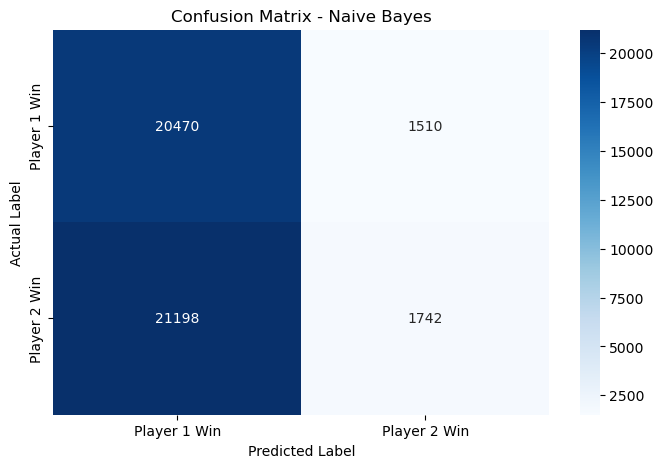


Classification Report:
              precision    recall  f1-score   support

Player 1 Win       0.49      0.93      0.64     21980
Player 2 Win       0.54      0.08      0.13     22940

    accuracy                           0.49     44920
   macro avg       0.51      0.50      0.39     44920
weighted avg       0.51      0.49      0.38     44920

Accuracy Score: 0.49447907390917184


In [326]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Visualisasi heatmap dengan label yang jelas
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Player 1 Win", "Player 2 Win"],
            yticklabels=["Player 1 Win", "Player 2 Win"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Player 1 Win", "Player 2 Win"]))

# Akurasi
print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [328]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.93      0.64     21980
           1       0.54      0.08      0.13     22940

    accuracy                           0.49     44920
   macro avg       0.51      0.50      0.39     44920
weighted avg       0.51      0.49      0.38     44920



## Visualising the Training set results

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16216\1348786668.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


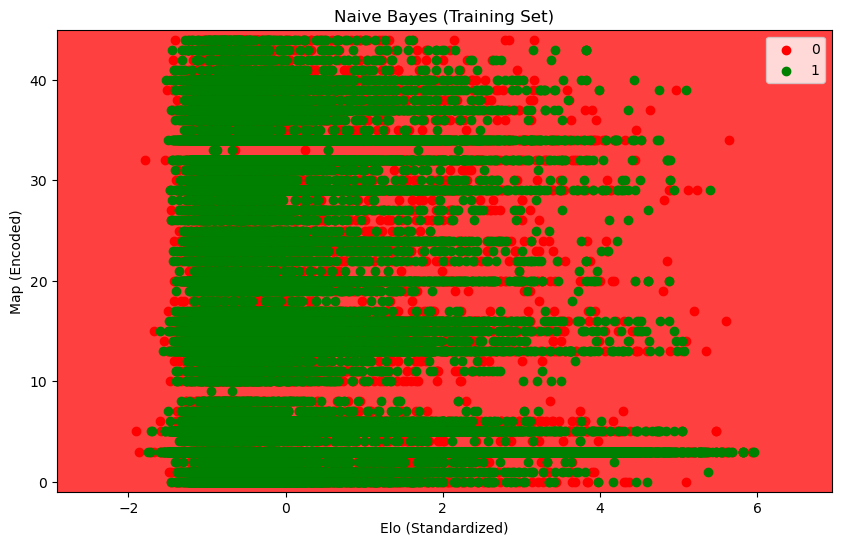

In [338]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB

# Ambil hanya dua kolom: 'elo' (numerik) dan 'map' (kategori)
X_vis = dataset[['elo', 'map']].copy()
y_vis = dataset['winner'].copy()

# Encode kolom 'map'
le_map = LabelEncoder()
X_vis['map'] = le_map.fit_transform(X_vis['map'])

# Split data
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis.values, y_vis.values, test_size=0.2, random_state=42)

# Standarisasi 'elo'
sc = StandardScaler()
X_train_vis[:, 0:1] = sc.fit_transform(X_train_vis[:, 0:1])
X_test_vis[:, 0:1] = sc.transform(X_test_vis[:, 0:1])

# Train model Naive Bayes
classifier_vis = GaussianNB()
classifier_vis.fit(X_train_vis, y_train_vis)

# Visualisasi
X_set, y_set = X_train_vis, y_train_vis
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
Z = classifier_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Training Set)')
plt.xlabel('Elo (Standardized)')
plt.ylabel('Map (Encoded)')
plt.legend()
plt.show()

## Visualising the Test set results

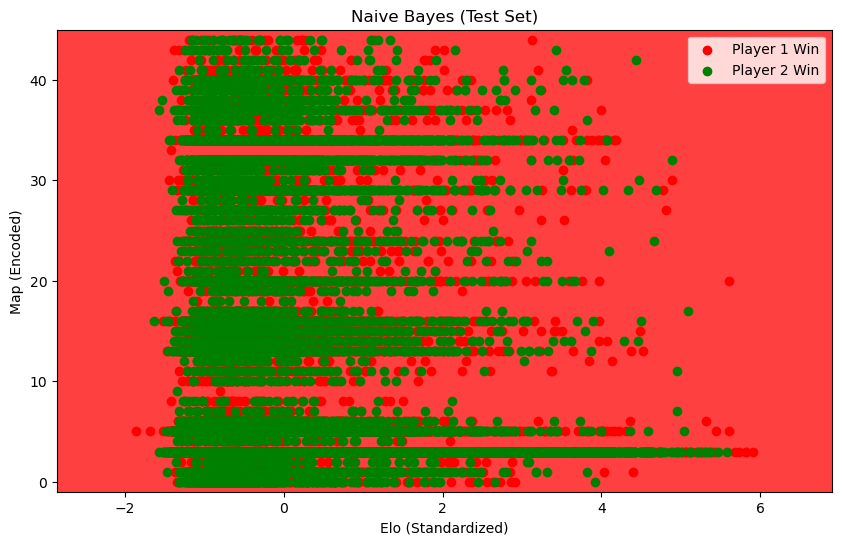

In [341]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Gunakan kembali model dan data yang sudah di-preprocess dengan 2 fitur: 'elo' dan 'map'
X_set, y_set = X_test_vis, y_test_vis

# Membuat grid untuk visualisasi kontur prediksi
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Prediksi seluruh grid
Z = classifier_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Gambar contour hasil prediksi
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot titik-titik test set
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=f'Player {j+1} Win')

plt.title('Naive Bayes (Test Set)')
plt.xlabel('Elo (Standardized)')
plt.ylabel('Map (Encoded)')
plt.legend()
plt.show()

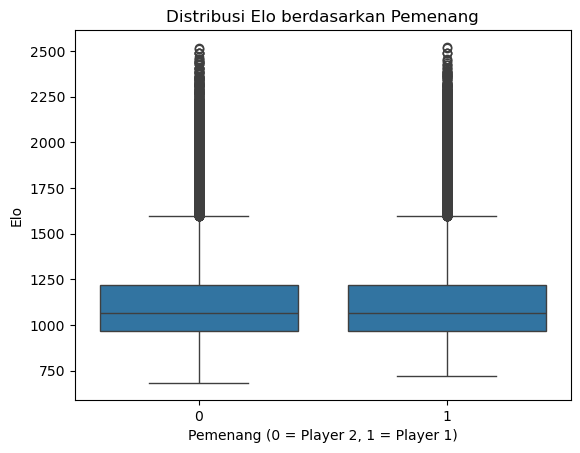

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

# Coba lihat distribusi elo terhadap siapa yang menang
sns.boxplot(data=dataset, x='winner', y='elo')
plt.title("Distribusi Elo berdasarkan Pemenang")
plt.xlabel("Pemenang (0 = Player 2, 1 = Player 1)")
plt.ylabel("Elo")
plt.show()

In [345]:
map_winrate = dataset.groupby('map')['winner'].mean().sort_values(ascending=False)
print(map_winrate)

map
Coastal               0.750000
Northern Isles        0.600000
Greenland             0.592593
Haboob                0.548223
Team Islands          0.538945
Valley                0.527913
Water Nomad           0.527473
Land Madness          0.522828
Marketplace           0.521790
Mongolia              0.519417
Socotra               0.518797
Islands               0.518519
Wade                  0.517241
Baltic                0.515738
Hill Fort             0.515464
Lowland               0.515152
Ghost Lake            0.514821
Gold Rush             0.514021
Hideout               0.512900
Migration             0.511188
Arabia                0.510849
Acropolis             0.510421
Nomad                 0.509851
Steppe                0.509685
Arena                 0.508814
Runestones            0.507773
African Clearing      0.506641
Atacama               0.504082
Golden Pit            0.501506
Crater                0.500664
Coastal Forest        0.500000
Aftermath             0.499115
Arch

In [347]:
pd.crosstab(dataset['map'], dataset['winner'], normalize='index') * 100

winner,0,1
map,,
Acropolis,48.957851,51.042149
African Clearing,49.335863,50.664137
Aftermath,50.088496,49.911504
Arabia,48.915062,51.084938
Archipelago,50.089127,49.910873
Arena,49.118609,50.881391
Atacama,49.591764,50.408236
Baltic,48.426150,51.573850
Cenotes,52.490421,47.509579


In [349]:
# Filter hanya baris di mana Player 1 menang (winner = 1)
p1_wins = dataset[dataset['winner'] == 1]

# Hitung jumlah kemenangan Player 1 berdasarkan map dan civ
p1_win_counts = p1_wins.groupby(['map', 'p1_civ']).size().reset_index(name='p1_win_count')

# Hitung total pertandingan untuk kombinasi map dan civ player 1
p1_total = dataset.groupby(['map', 'p1_civ']).size().reset_index(name='total_matches')

# Gabungkan keduanya dan hitung winrate
p1_stats = pd.merge(p1_win_counts, p1_total, on=['map', 'p1_civ'])
p1_stats['p1_winrate'] = p1_stats['p1_win_count'] / p1_stats['total_matches']

# Urutkan berdasarkan winrate tertinggi
p1_stats.sort_values(by='p1_winrate', ascending=False).head(10)

,map,p1_civ,p1_win_count,total_matches,p1_winrate
662,Greenland,Incas,2,2,1.0
823,Islands,Vietnamese,2,2,1.0
295,Baltic,Mongols,8,8,1.0
299,Baltic,Sicilians,4,4,1.0
302,Baltic,Tatars,1,1,1.0
665,Greenland,Japanese,2,2,1.0
341,Coastal,Bulgarians,1,1,1.0
342,Coastal,Goths,1,1,1.0
343,Coastal,Huns,1,1,1.0
1117,Migration,Slavs,4,4,1.0


In [351]:
# Filter hanya baris di mana Player 2 menang (winner = 0)
p2_wins = dataset[dataset['winner'] == 0]

# Hitung jumlah kemenangan Player 2 berdasarkan map dan civ
p2_win_counts = p2_wins.groupby(['map', 'p2_civ']).size().reset_index(name='p2_win_count')

# Hitung total pertandingan untuk kombinasi map dan civ player 2
p2_total = dataset.groupby(['map', 'p2_civ']).size().reset_index(name='total_matches')

# Gabungkan dan hitung winrate
p2_stats = pd.merge(p2_win_counts, p2_total, on=['map', 'p2_civ'])
p2_stats['p2_winrate'] = p2_stats['p2_win_count'] / p2_stats['total_matches']

# Urutkan berdasarkan winrate tertinggi
p2_stats.sort_values(by='p2_winrate', ascending=False).head(10)

,map,p2_civ,p2_win_count,total_matches,p2_winrate
801,Islands,Mayans,3,3,1.0
979,Marketplace,Incas,5,5,1.0
320,Cenotes,Italians,2,2,1.0
638,Golden Swamp,Sicilians,9,9,1.0
954,Lowland,Portuguese,1,1,1.0
403,Crater,Saracens,6,6,1.0
1521,Wade,Vietnamese,2,2,1.0
802,Islands,Mongols,7,7,1.0
1457,Volcanic Island,Burmese,2,2,1.0
1267,Serengeti,Burmese,2,2,1.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16216\365297245.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=map_civ_stats, x='p1_winrate', y='p1_civ', ax=axes[i], palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16216\365297245.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=map_civ_stats, x='p1_winrate', y='p1_civ', ax=axes[i], palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16216\365297245.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=map_civ_stats, x='p1_winrate', y='p1_civ',

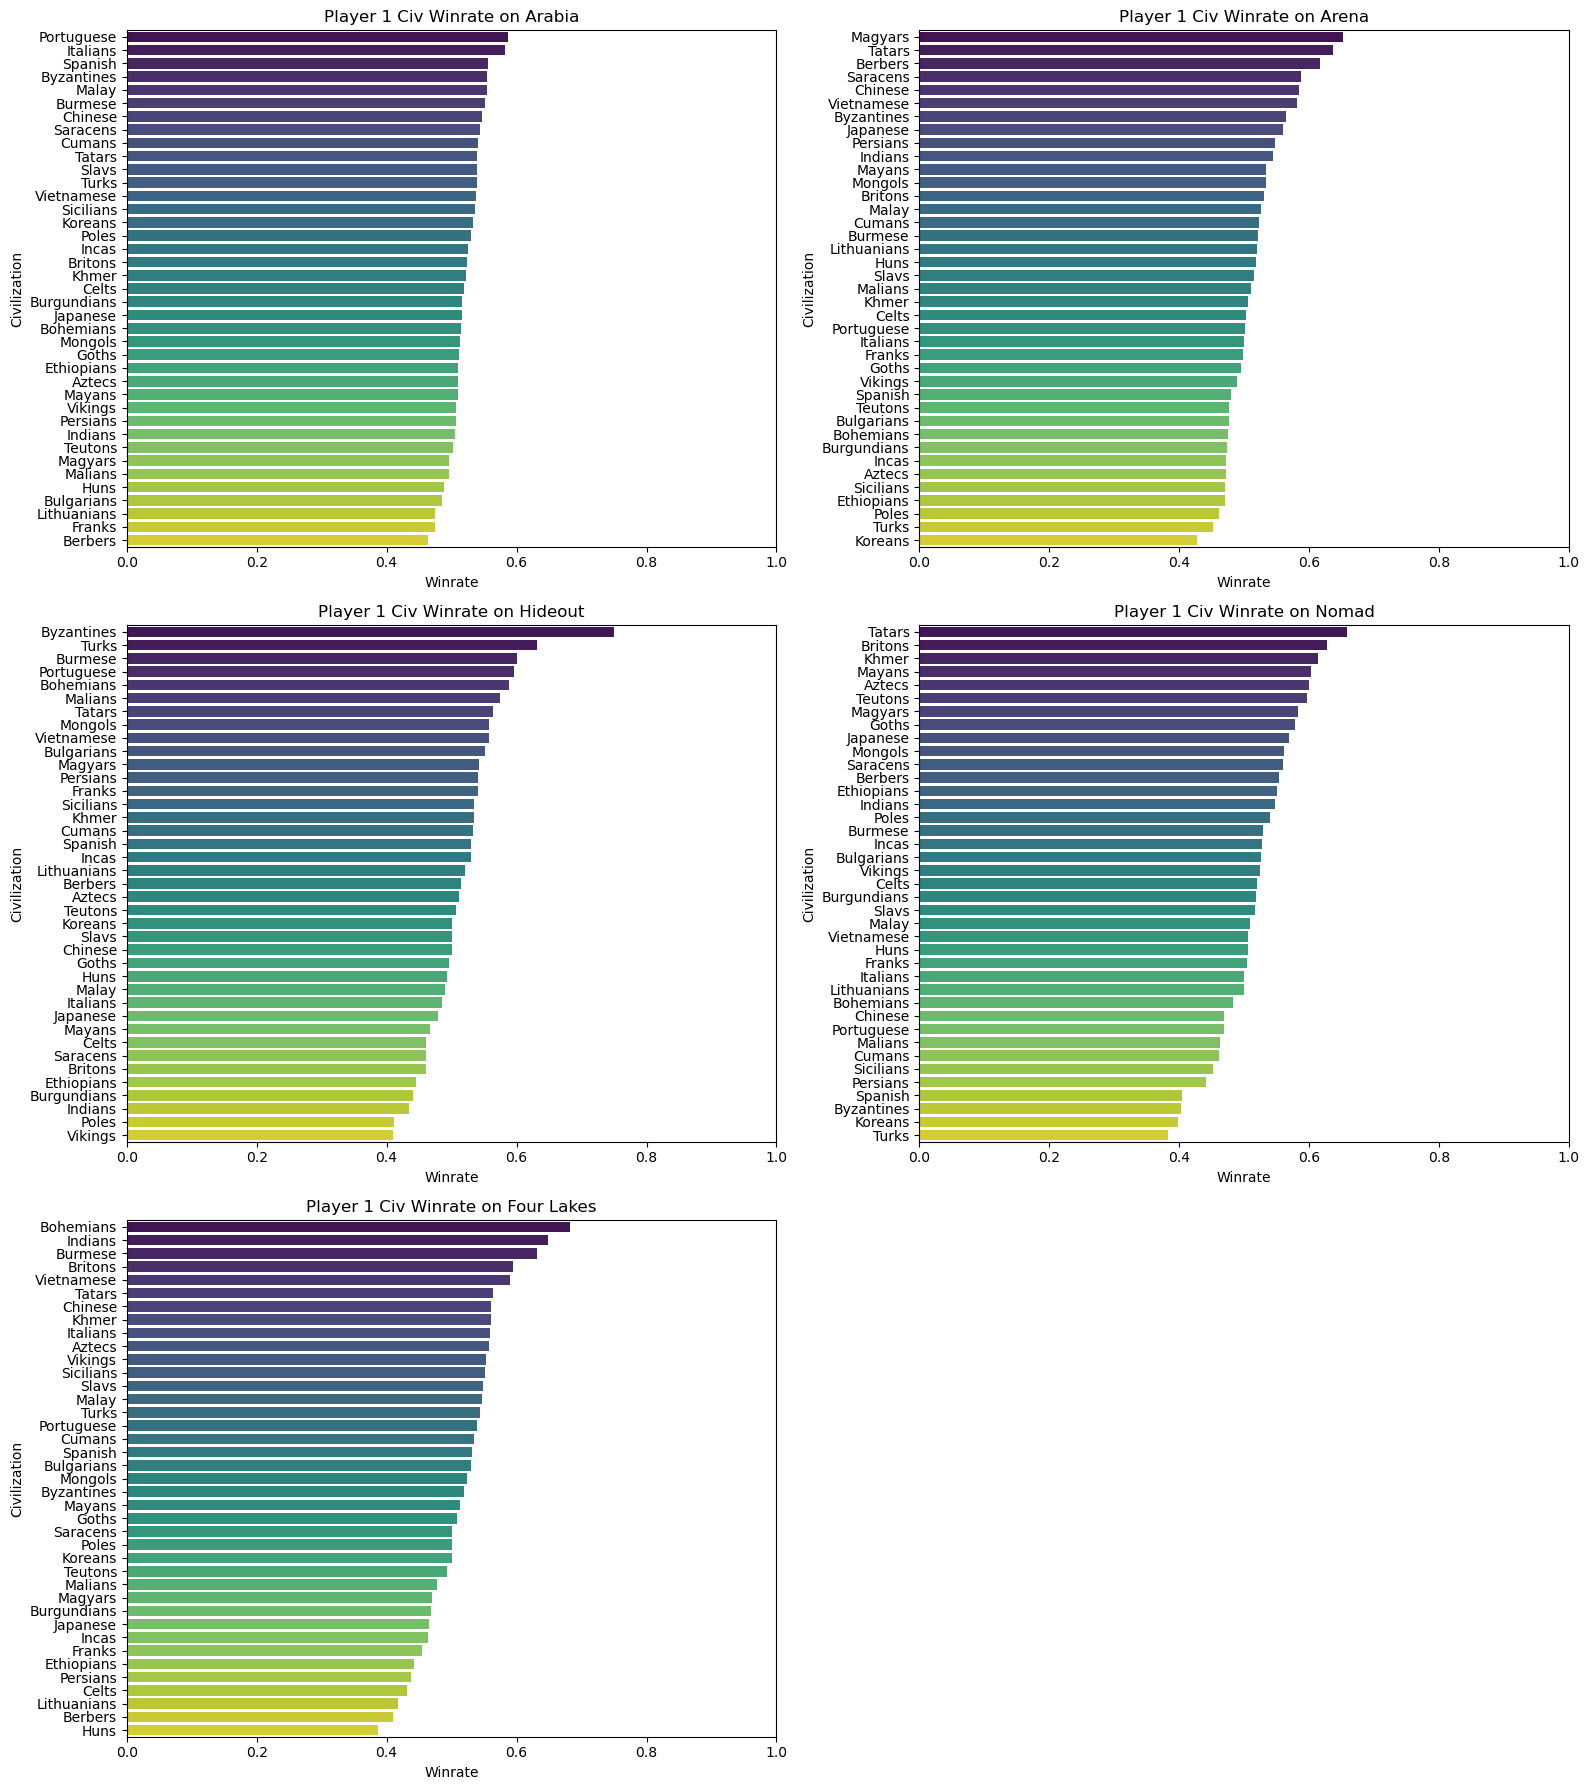

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar map yang ingin divisualisasikan
map_list = ["Arabia", "Arena", "Hideout", "Nomad", "Four Lakes"]

# Atur ukuran dan layout plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
axes = axes.flatten()

# Loop setiap map dan buat plot-nya
for i, map_name in enumerate(map_list):
    # Filter civ Player 1 di map tersebut
    map_civ_stats = p1_stats[p1_stats['map'] == map_name].sort_values(by='p1_winrate', ascending=False)
    
    # Ambil hanya civ dengan minimal 5 pertandingan (opsional, supaya hasilnya tidak bias)
    map_civ_stats = map_civ_stats[map_civ_stats['total_matches'] >= 5]
    
    # Plot bar chart
    sns.barplot(data=map_civ_stats, x='p1_winrate', y='p1_civ', ax=axes[i], palette='viridis')
    axes[i].set_title(f"Player 1 Civ Winrate on {map_name}")
    axes[i].set_xlim(0, 1)
    axes[i].set_xlabel("Winrate")
    axes[i].set_ylabel("Civilization")

# Hapus subplot kosong kalau ada
for j in range(len(map_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [357]:
# Buat kolom baru untuk civilization yang menang
dataset['winning_civ'] = dataset.apply(lambda row: row['p1_civ'] if row['winner'] == 1 else row['p2_civ'], axis=1)

# Gabungkan civ yang tampil baik sebagai p1 atau p2 di suatu map
civ_map_win_counts = dataset.groupby(['map', 'winning_civ']).size().reset_index(name='win_count')

# Total semua pertandingan civ pada map (baik menang atau kalah)
# Gabungkan p1_civ dan p2_civ jadi satu dataframe panjang
civ_map_total = pd.concat([
    dataset[['map', 'p1_civ']].rename(columns={'p1_civ': 'civ'}),
    dataset[['map', 'p2_civ']].rename(columns={'p2_civ': 'civ'})
])
civ_map_total_counts = civ_map_total.groupby(['map', 'civ']).size().reset_index(name='total_matches')

# Gabungkan dengan win_count
merged = pd.merge(civ_map_total_counts, civ_map_win_counts, how='left',
                  left_on=['map', 'civ'], right_on=['map', 'winning_civ'])
merged['win_count'] = merged['win_count'].fillna(0)
merged['winrate'] = merged['win_count'] / merged['total_matches']

# Hapus kolom tambahan
merged = merged.drop(columns='winning_civ')

# Lihat hasil tertinggi
merged.sort_values(by='winrate', ascending=False).head(10)

,map,civ,total_matches,win_count,winrate
1138,Migration,Indians,3,3.0,1.0
1665,Yucatan,Tatars,7,7.0,1.0
1547,Volcanic Island,Portuguese,3,3.0,1.0
184,Archipelago,Poles,3,3.0,1.0
314,Cenotes,Burmese,3,3.0,1.0
278,Baltic,Burmese,5,5.0,1.0
1249,Northern Isles,Turks,1,1.0,1.0
696,Greenland,Teutons,2,2.0,1.0
162,Archipelago,Burmese,4,4.0,1.0
1248,Northern Isles,Slavs,1,1.0,1.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16216\899573761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=arena_civ_stats, x='winrate', y='civ', palette='coolwarm')


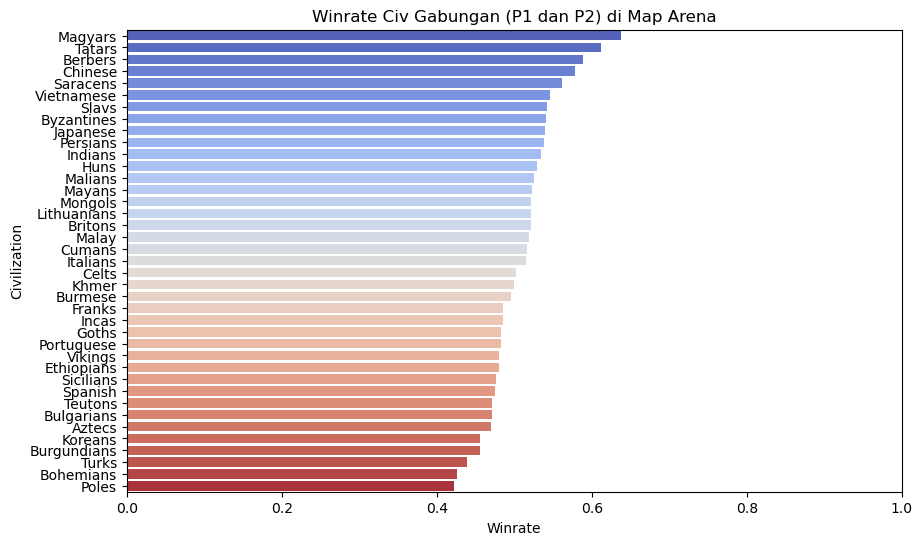

In [359]:
arena_civ_stats = merged[merged['map'] == 'Arena'].sort_values(by='winrate', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=arena_civ_stats, x='winrate', y='civ', palette='coolwarm')
plt.title("Winrate Civ Gabungan (P1 dan P2) di Map Arena")
plt.xlabel("Winrate")
plt.ylabel("Civilization")
plt.xlim(0, 1)
plt.show()